In [ ]:
#TD learning

import numpy as np
import matplotlib.pyplot as plt


gamma=0.8                                   #the discount factor  
reward=np.array([0,1,0,0.5,0])              #the reward amount
pattern_vector=np.random.random((10, 5))    #random patterns for the five states
w=np.random.random((1, 10))                 #random initial weights are chosen
V_mem=0                                     #the short-term memories are initialized
previous_state=4
TDerror=np.zeros((1,100))                   #initialisation of TD errors


In [ ]:
for episode in range (0,100):                                   #the loop over episodes
  TDerror[0,episode]=0

  for pattern in range(0,4):                                    #pattern for each episode in a fixed sequence
    V=np.matmul(w, pattern_vector[:,pattern])                   #calculation of value function from the current approximation
    rhat=reward[previous_state]+gamma*V-V_mem                   #calculation of learning signal    
    pv_tpose=np.transpose(pattern_vector[:,previous_state])     
    summation=0.2*rhat*pv_tpose                                 #updating weights with a learning rate α = 0.2
    w=w+summation
    TDerror[0,episode]+=abs(rhat)                               #calcualtion of learning errors
    previous_state=pattern                                      #Updating short term memories
    V_mem=V


    

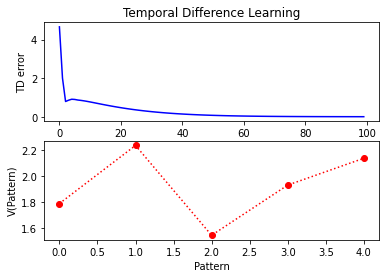

In [ ]:

#Plotting the results


#plotting of temporal differnce learning
fig1=plt.subplot(2,1,1)
epi=np.arange(0, 100, 1, int).reshape(100,1)
a=TDerror[0,:].reshape(100,1)
plt.plot(epi,a, 'b')
plt.title('Temporal Difference Learning') 
fig1.set_xlabel('Episode')
plt.ylabel("TD error")




plt.subplot(2,1,2)
V_patt=np.matmul(w,pattern_vector).reshape(5,1)
pattern=np.arange(0, 5, 1, int).reshape(5,1)
plt.plot(pattern,V_patt, ':ro')
plt.xlabel("Pattern")
plt.ylabel("V(Pattern)")

plt.show()